In [3]:
import MDAnalysis as mda
import warnings
# suppress some MDAnalysis warnings about PSF files
warnings.filterwarnings('ignore')
from MDAnalysis.analysis import align
import nglview as nv
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import dihedrals
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Initialize Universe with Gromacs files
u = mda.Universe('npt_modified.gro', 'centered_nojump_md.xtc')

# Align and average structure
average = align.AverageStructure(u, u, select='protein and name CA', ref_frame=0).run()
ref = average.results.universe
aligner = align.AlignTraj(u, ref, select='protein and name CA', in_memory=True).run()

# Select a specific segment
system = u.select_atoms ('all')
alpha = u.select_atoms('bynum 1:4368')
ct_alpha = u.select_atoms('bynum 4368:4505')
beta = u.select_atoms('bynum 4506:8802')
ct_beta = u.select_atoms('bynum 8802:9035')
stalk = u.select_atoms('bynum 9036:9808', 'bynum 10732 :11596')
mtbd = u.select_atoms('bynum 9809:10726')
tublin = alpha + beta
ctails = ct_alpha + ct_beta
sys_wo_ct_stalk = system - ctails - stalk
mtbd_stalk = stalk+mtbd




In [3]:
for residue in ct_beta.residues:
    print(f"Residue {residue.resid} is {residue.resname}")

Residue 426 is GLN
Residue 427 is ASP
Residue 428 is ALA
Residue 429 is THR
Residue 430 is ALA
Residue 431 is GLU
Residue 432 is GLU
Residue 433 is GLU
Residue 434 is GLY
Residue 435 is GLU
Residue 436 is MET
Residue 437 is TYR
Residue 438 is GLU
Residue 439 is ASP
Residue 440 is ASP
Residue 441 is GLU
Residue 442 is GLU
Residue 443 is GLU
Residue 444 is SER
Residue 445 is GLU
Residue 446 is ALA
Residue 447 is GLN
Residue 448 is GLY
Residue 449 is PRO
Residue 450 is LYS


In [4]:
import matplotlib.pyplot as plt

# Update the font to 'Times New Roman'
plt.rcParams["font.family"] = "Times New Roman"

# Update the font size to 12
plt.rcParams.update({'font.size': 12})

import matplotlib.ticker as ticker

def setup_plot(x_label, y_label, xmin=None, xmax=None, ymin=None, ymax=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 8)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.tick_params(labelsize=12)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    if xmin is not None and xmax is not None:
        ax.set_xlim(left=xmin, right=(xmax*1.05))
    if ymin is not None and ymax is not None:
        ax.set_ylim(bottom=ymin, top=(ymax*1.15))

    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

    return fig, ax


Average RMSD: 7.123836690889749


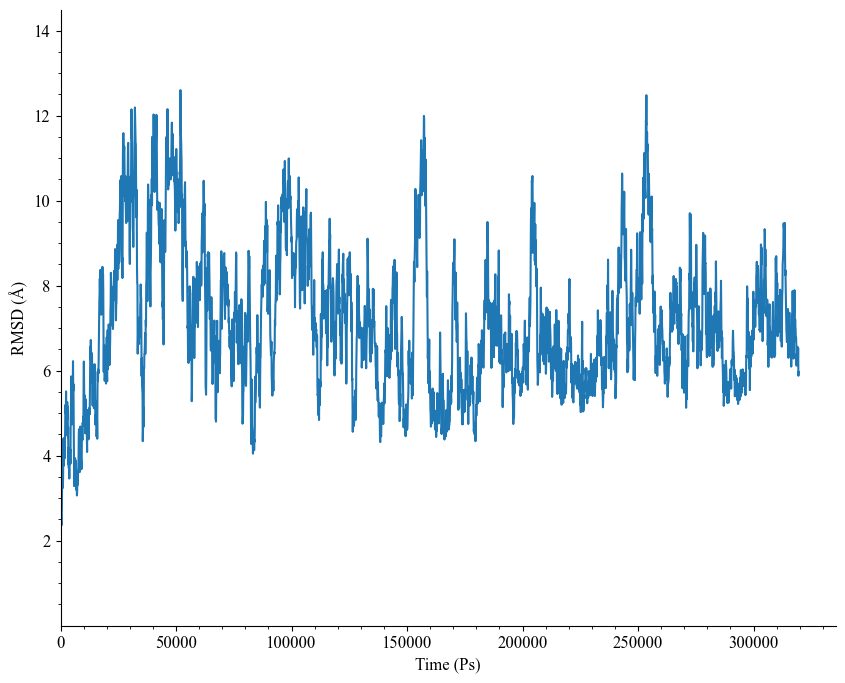

In [5]:
# Compute the RMSD for all atoms in the system
rmsd = rms.RMSD(u, u).run()

# Extract the RMSD values
rmsd_values = rmsd.rmsd.T   # transpose for easier manipulation

time = rmsd_values[1]
rmsd_values = rmsd_values[2]

# Compute the average RMSD
average_rmsd = np.mean(rmsd_values)
print(f"Average RMSD: {average_rmsd}")

# Plot the RMSD values
fig, ax = setup_plot('Time (Ps)', 'RMSD (Å)', xmin=min(time), xmax=max(time), ymin=min(rmsd_values), ymax=max(rmsd_values))
ax.plot(time, rmsd_values)
plt.savefig("Final Graphs/raw_RMSD", dpi=300)
plt.show()

Average RMSD: 3.6966208916578807


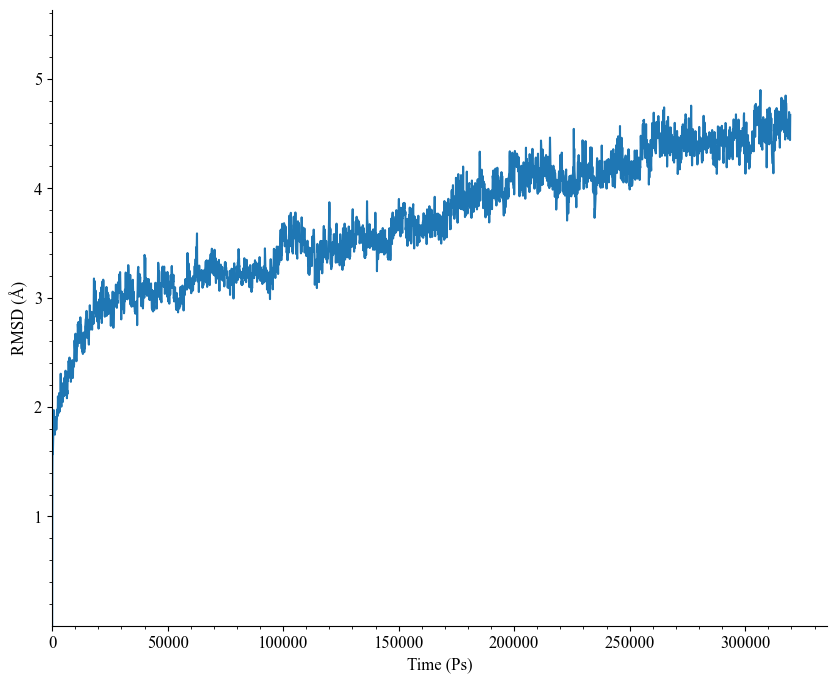

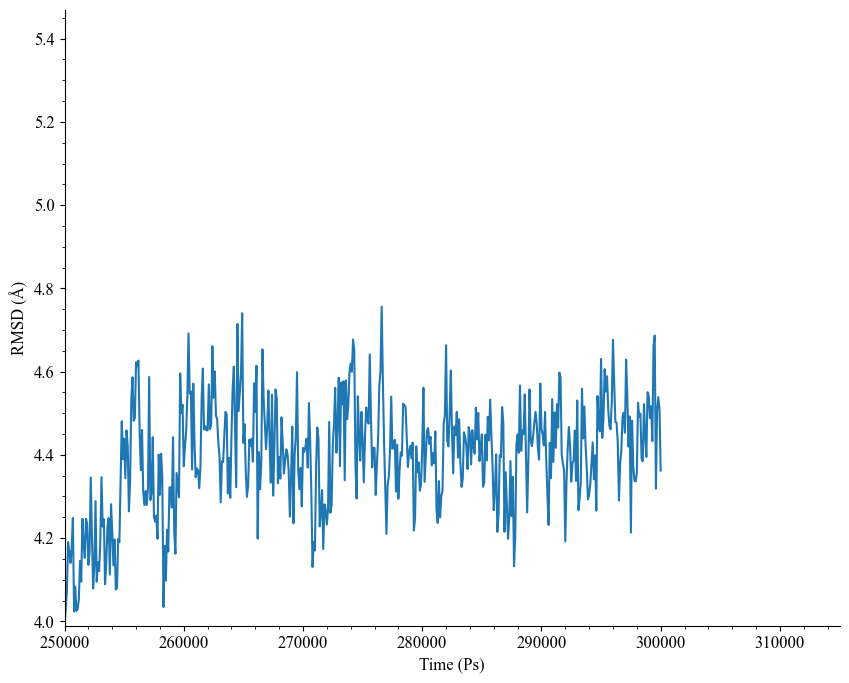

In [9]:
# Compute the RMSD for all atoms in the system
rmsd = rms.RMSD(sys_wo_ct_stalk, sys_wo_ct_stalk).run()

# Extract the RMSD values
rmsd_values = rmsd.rmsd.T   # transpose for easier manipulation

time = rmsd_values[1]
rmsd_values = rmsd_values[2]
average_rmsd = np.mean(rmsd_values)
print(f"Average RMSD: {average_rmsd}")
# Filter the time and RMSD values for the specified range
start_time, end_time = 250000, 300000
mask = np.logical_and(time >= start_time, time <= end_time)

filtered_time = time[mask]
filtered_rmsd_values = rmsd_values[mask]

# Plot the RMSD values for all times
fig, ax = setup_plot('Time (Ps)', 'RMSD (Å)', xmin=min(time), xmax=max(time), ymin=min(rmsd_values), ymax=max(rmsd_values))
ax.plot(time, rmsd_values)
plt.savefig("Final Graphs/system_wo_ct_stalk_RMSD", dpi=300)
plt.show()

# Plot the RMSD values for the filtered times
fig, ax = setup_plot('Time (Ps)', 'RMSD (Å)', xmin=min(filtered_time), xmax=max(filtered_time), ymin=min(filtered_rmsd_values), ymax=max(filtered_rmsd_values))
ax.plot(filtered_time, filtered_rmsd_values)
plt.savefig("Final Graphs/system_wo_ct_stalk_RMSD_filtered", dpi=300)
plt.show()

Average RMSD: 3.028229898194072
RMSD for mtbd


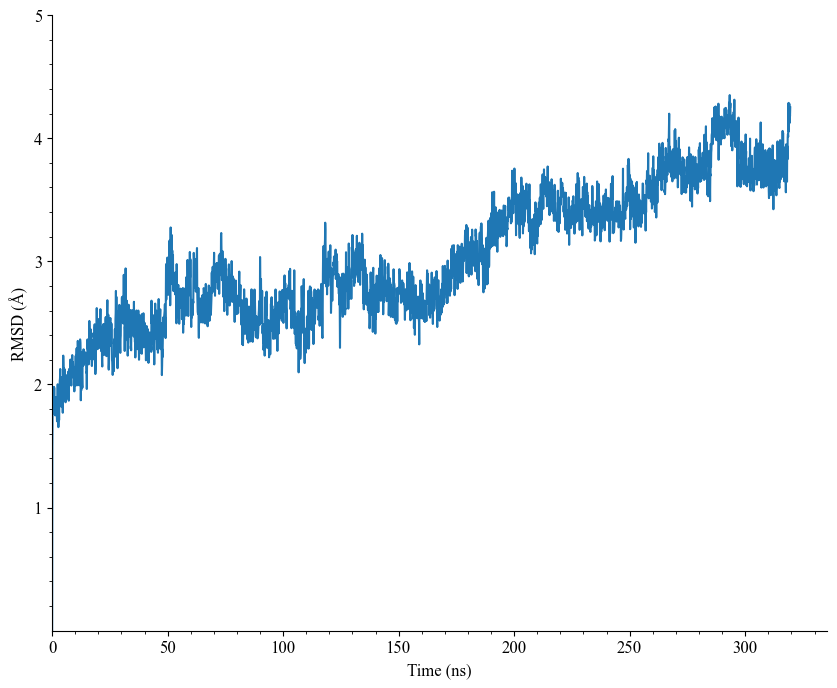

In [11]:
# Compute the RMSD for mtbd
rmsd = rms.RMSD(mtbd, mtbd).run()

# Extract the RMSD values
rmsd_values = rmsd.rmsd.T   # transpose for easier manipulation

time_ps = rmsd_values[1]  # in picoseconds
rmsd_values = rmsd_values[2]

# Compute the average RMSD
average_rmsd = np.mean(rmsd_values)
print(f"Average RMSD: {average_rmsd}")

# Convert time to nanoseconds for plotting
time_ns = time_ps / 1000

print("RMSD for mtbd")
# Plot the RMSD values for all times
fig, ax = setup_plot('Time (ns)', 'RMSD (Å)', xmin=min(time_ns), xmax=max(time_ns), ymin=min(rmsd_values), ymax=max(rmsd_values))
ax.plot(time_ns, rmsd_values)
plt.savefig("Final Graphs/mtbd_RMSD.png", dpi=300)
plt.show()


Average RMSD: 3.439683471478588
RMSD for tublin


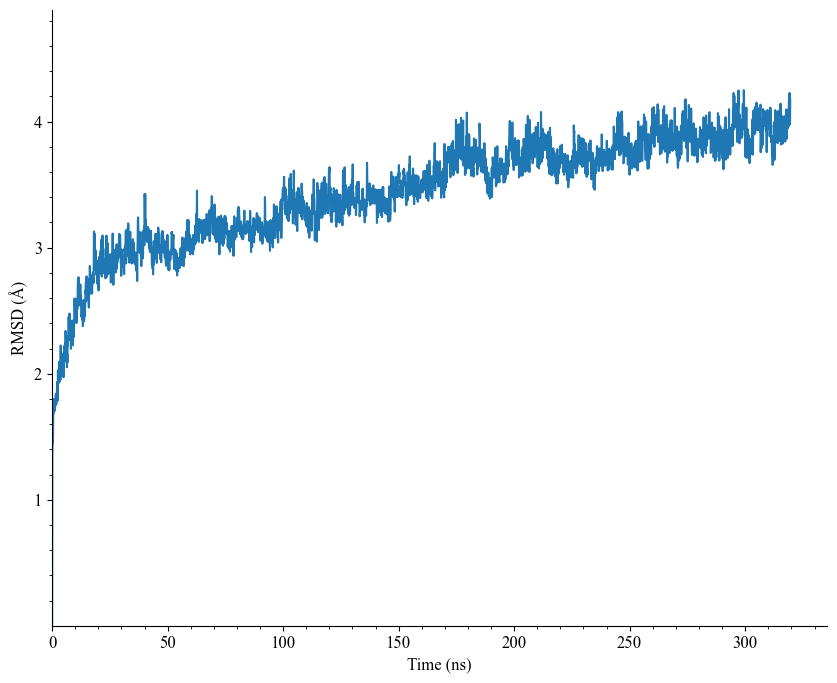

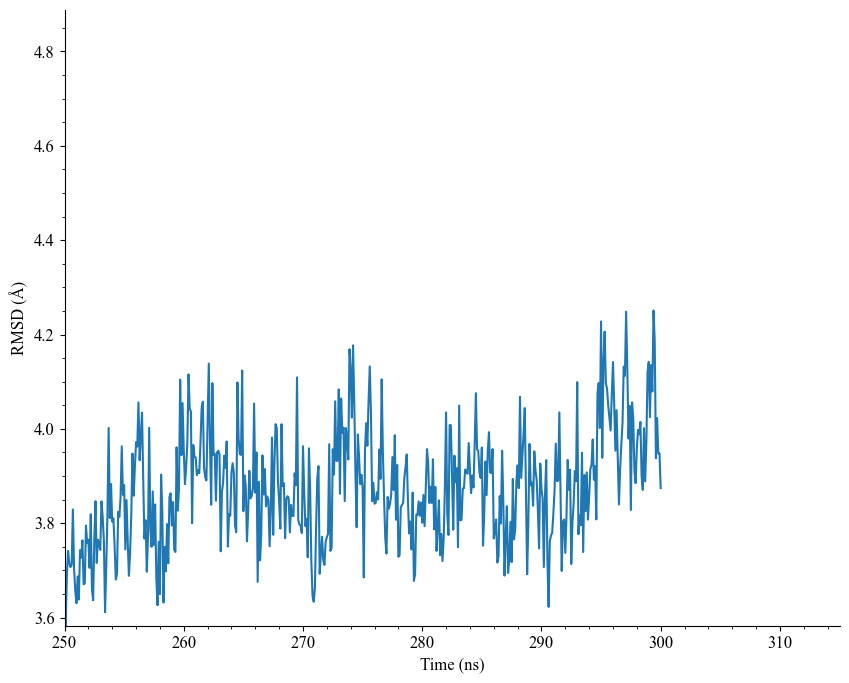

In [12]:
# Compute the RMSD for tublin
rmsd = rms.RMSD(tublin, tublin).run()

# Extract the RMSD values
rmsd_values = rmsd.rmsd.T   # transpose for easier manipulation

time_ps = rmsd_values[1]  # in picoseconds
rmsd_values = rmsd_values[2]

# Compute the average RMSD
average_rmsd = np.mean(rmsd_values)
print(f"Average RMSD: {average_rmsd}")

# Convert time to nanoseconds for plotting
time_ns = time_ps / 1000

# Filter the time and RMSD values for the specified range
start_time, end_time = 250, 300  # in nanoseconds
mask = np.logical_and(time_ns >= start_time, time_ns <= end_time)

filtered_time_ns = time_ns[mask]
filtered_rmsd_values = rmsd_values[mask]

print("RMSD for tublin")
# Plot the RMSD values for all times
fig, ax = setup_plot('Time (ns)', 'RMSD (Å)', xmin=min(time_ns), xmax=max(time_ns), ymin=min(rmsd_values), ymax=max(rmsd_values))
ax.plot(time_ns, rmsd_values)
plt.savefig("Final Graphs/dimer_RMSD.png", dpi=300)
plt.show()

# Plot the RMSD values for the filtered times
fig, ax = setup_plot('Time (ns)', 'RMSD (Å)', xmin=min(filtered_time_ns), xmax=max(filtered_time_ns), ymin=min(filtered_rmsd_values), ymax=max(filtered_rmsd_values))
ax.plot(filtered_time_ns, filtered_rmsd_values)
plt.savefig("Final Graphs/dimer_RMSD_filtered.png", dpi=300)
plt.show()


Average RMSD: 3.4864739771822433


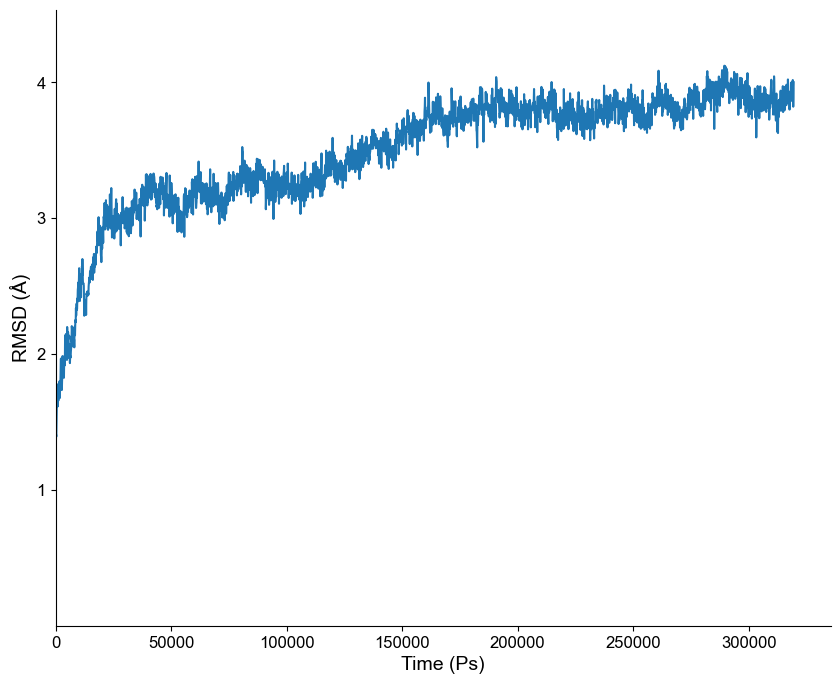

In [67]:

rmsd = rms.RMSD(alpha, alpha).run()

# Extract the RMSD values
rmsd_values = rmsd.rmsd.T   # transpose for easier manipulation

time = rmsd_values[1]
rmsd_values = rmsd_values[2]

average_rmsd = np.mean(rmsd_values)
print(f"Average RMSD: {average_rmsd}")

# Plot the RMSD values
fig, ax = setup_plot('Time (Ps)', 'RMSD (Å)', xmin=min(time), xmax=max(time), ymin=min(rmsd_values), ymax=max(rmsd_values))
ax.plot(time, rmsd_values)
plt.savefig("Alpha_RMSD", dpi=300)
plt.show()

Average RMSD: 2.738710891307696


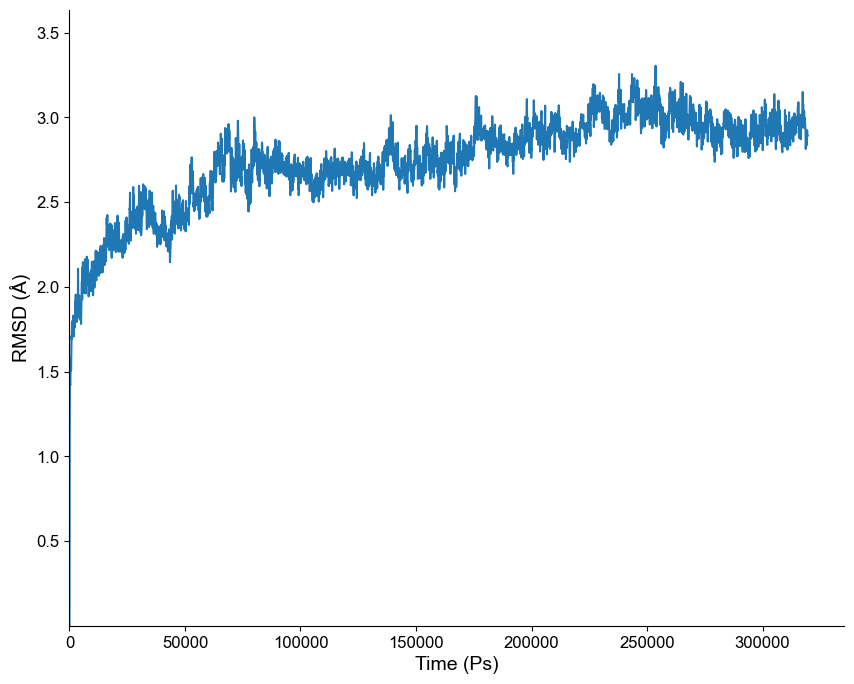

In [68]:
# Compute the RMSD for all atoms in the system
rmsd = rms.RMSD(beta, beta).run()

# Extract the RMSD values
rmsd_values = rmsd.rmsd.T   # transpose for easier manipulation

time = rmsd_values[1]
rmsd_values = rmsd_values[2]
average_rmsd = np.mean(rmsd_values)
print(f"Average RMSD: {average_rmsd}")
# Plot the RMSD values
fig, ax = setup_plot('Time (Ps)', 'RMSD (Å)', xmin=min(time), xmax=max(time), ymin=min(rmsd_values), ymax=max(rmsd_values))
ax.plot(time, rmsd_values)
plt.savefig("beta_RMSD", dpi=300)
plt.show()

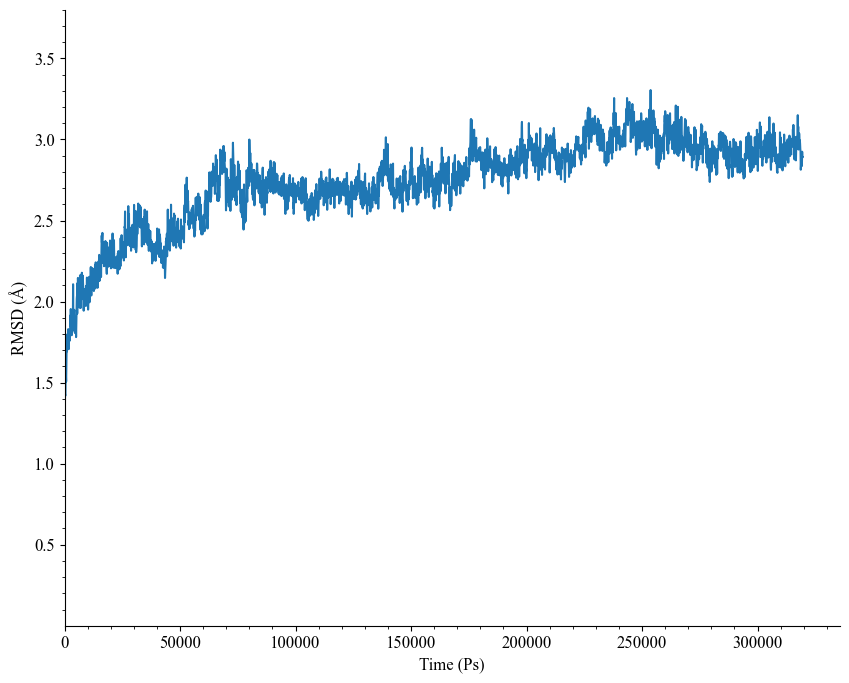

In [5]:
# Compute the RMSD for all atoms in the system
rmsd = rms.RMSD(beta, beta).run()

# Extract the RMSD values
rmsd_values = rmsd.rmsd.T   # transpose for easier manipulation

time = rmsd_values[1]
rmsd_values = rmsd_values[2]

# Plot the RMSD values
fig, ax = setup_plot('Time (Ps)', 'RMSD (Å)', xmin=min(time), xmax=max(time), ymin=min(rmsd_values), ymax=max(rmsd_values))
ax.plot(time, rmsd_values)
plt.savefig("beta_RMSD", dpi=300)
plt.show()

In [6]:
def calculate_rmsf(selection):
    rmsf_per_residue = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_per_residue.append(np.mean(rmsf.rmsf))
    return rmsf_per_residue

# Define your selections
selections = {
    'Alpha': alpha,
    'Ct_Alpha': ct_alpha,
    'Beta': beta,
    'Ct_Beta': ct_beta,
}

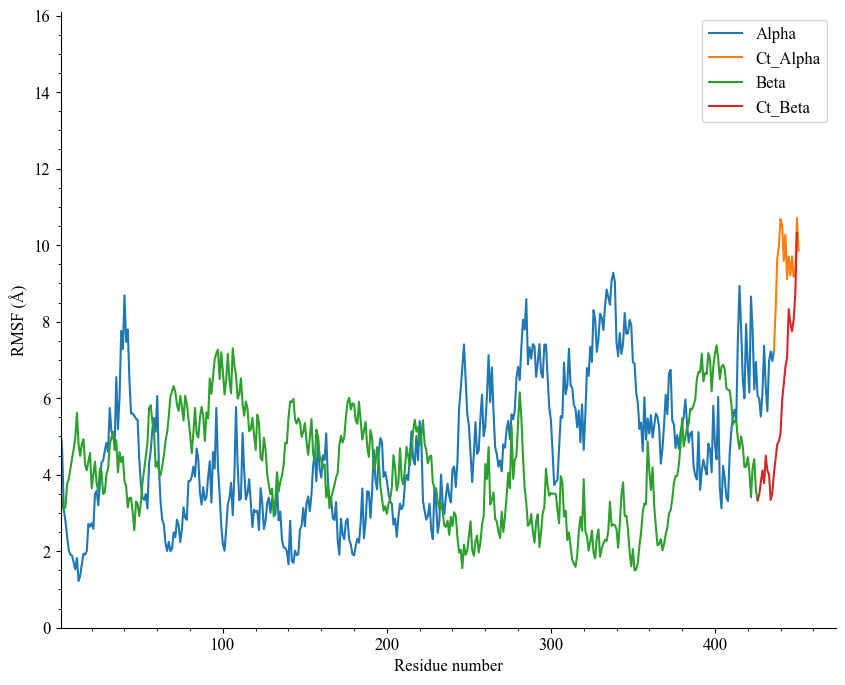

In [10]:
# Initialize the plot
xmin = 1
ymin = 0
xmax = 451
ymax = 10
fig, ax = setup_plot('Residue number', 'RMSF (Å)', xmin, xmax, ymin, ymax)

# Calculate RMSF for each selection and plot
for name, selection in selections.items():
    rmsf = calculate_rmsf(selection)
    ax.plot(selection.residues.resids, rmsf, label=name)

# Add legend to the plot
plt.legend()
# Save the plot as png with 300 dpi
plt.savefig("Final Graphs/rmsf_plot.png", dpi=300)

# Display the plot
plt.show()

In [69]:
def calculate_rmsf(selection):
    rmsf_data = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_avg = np.mean(rmsf.rmsf)
        rmsf_data.append((rmsf_avg, residue.resid, residue.resname))
    return rmsf_data

# Define your selections
selections = {
    'Alpha': alpha,
    'Ct_Alpha': ct_alpha,
    'Beta': beta,
    'Ct_Beta': ct_beta,
}

# For each selection, calculate RMSF and find the residue with highest and lowest RMSF
for name, selection in selections.items():
    rmsf_data = calculate_rmsf(selection)
    # Sort the data by RMSF values
    rmsf_data.sort()
    # The first element in the sorted list has the lowest RMSF
    min_rmsf, min_resid, min_resname = rmsf_data[0]
    print(f"For {name}, residue {min_resid} ({min_resname}) has the lowest RMSF value: {min_rmsf}")
    # The last element in the sorted list has the highest RMSF
    max_rmsf, max_resid, max_resname = rmsf_data[-1]
    print(f"For {name}, residue {max_resid} ({max_resname}) has the highest RMSF value: {max_rmsf}")


For Alpha, residue 12 (ALA) has the lowest RMSF value: 1.2205202040802166
For Alpha, residue 338 (LYS) has the highest RMSF value: 9.27968972104929
For Ct_Alpha, residue 436 (GLY) has the lowest RMSF value: 7.248982140895016
For Ct_Alpha, residue 450 (GLU) has the highest RMSF value: 10.704728740763626
For Beta, residue 351 (VAL) has the lowest RMSF value: 1.495457645423512
For Beta, residue 401 (GLU) has the highest RMSF value: 7.382785964357112
For Ct_Beta, residue 426 (GLN) has the lowest RMSF value: 3.3306156860442715
For Ct_Beta, residue 450 (LYS) has the highest RMSF value: 10.314862397771638


In [70]:
def calculate_rmsf(selection):
    rmsf_data = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_avg = np.mean(rmsf.rmsf)
        rmsf_data.append((rmsf_avg, residue.resid, residue.resname))
    return rmsf_data

# Define your selections
selections = {
    'Alpha': alpha,
    'Beta': beta,
}

# For each selection, calculate RMSF and find the top ten residues with highest RMSF
for name, selection in selections.items():
    rmsf_data = calculate_rmsf(selection)
    # Sort the data by RMSF values
    rmsf_data.sort()
    # The last ten elements in the sorted list have the highest RMSF
    top_ten_rmsf = rmsf_data[-10:]
    print(f"For {name}, the top ten residues with highest RMSF values are:")
    for rmsf, resid, resname in reversed(top_ten_rmsf):  # reverse to start from highest
        print(f"Residue {resid} ({resname}): RMSF {rmsf}")


For Alpha, the top ten residues with highest RMSF values are:
Residue 338 (LYS): RMSF 9.27968972104929
Residue 337 (THR): RMSF 9.060317336679974
Residue 339 (ARG): RMSF 9.037202154039138
Residue 415 (GLU): RMSF 8.933595794156227
Residue 334 (THR): RMSF 8.836814304877056
Residue 40 (LYS): RMSF 8.689170221504197
Residue 422 (ARG): RMSF 8.65672294296345
Residue 335 (ILE): RMSF 8.63959223454416
Residue 285 (GLN): RMSF 8.588730247069298
Residue 336 (LYS): RMSF 8.440801924350001
For Beta, the top ten residues with highest RMSF values are:
Residue 401 (GLU): RMSF 7.382785964357112
Residue 106 (TYR): RMSF 7.3038165393875545
Residue 97 (ALA): RMSF 7.2664102820492955
Residue 99 (ASN): RMSF 7.199985002174585
Residue 396 (HIS): RMSF 7.180155863131005
Residue 96 (GLY): RMSF 7.170684353038918
Residue 392 (LYS): RMSF 7.162081990939872
Residue 103 (LYS): RMSF 7.161597782749553
Residue 400 (GLY): RMSF 7.148280310283907
Residue 402 (GLY): RMSF 7.03819442575287


TypeError: unhashable type: 'numpy.ndarray'

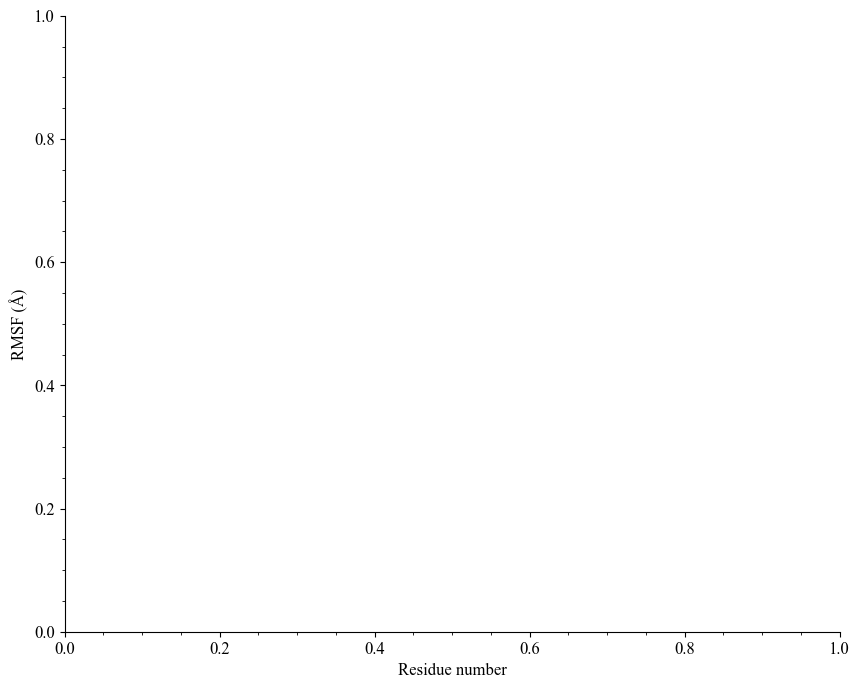

In [13]:
# Calculate the minimum residue number among all selections
xmin = min(residues.resids[0] for residues in selections.values())

# Initialize the plot
fig, ax = setup_plot('Residue number', 'RMSF (Å)', xmin=xmin)

# Calculate RMSF for each selection and plot
for name, selection in selections.items():
    rmsf = calculate_rmsf(selection)
    ax.plot(selection.residues.resids, rmsf, label=name)

# Add title
plt.title('Root Mean Square Fluctuation per Residue')

# Add legend to the plot
plt.legend()

# Adjust positions of plot elements to fit nicely within the plot area
plt.tight_layout()

# Save the plot as png with 300 dpi
plt.savefig("rmsf_plot.png", dpi=300)

# Display the plot
plt.show()

For mtbd, the top ten residues with highest RMSF values are:
Residue 3331 (SER): RMSF 8.061907907183624
Residue 3333 (THR): RMSF 7.521618754156133
Residue 3336 (LYS): RMSF 7.139454709712122
Residue 3332 (THR): RMSF 7.137071331636147
Residue 3334 (ASP): RMSF 6.994368222788728
Residue 3375 (PRO): RMSF 6.820309575852803
Residue 3373 (SER): RMSF 6.762212709361308
Residue 3369 (LYS): RMSF 6.758987543969645
Residue 3312 (ASN): RMSF 6.743561183658494
Residue 3337 (GLN): RMSF 6.68251478185725
Residue 3374 (ASN): RMSF 6.567891648803518
Residue 3335 (TRP): RMSF 6.503132624015259
Residue 3344 (ARG): RMSF 6.474708570034684
Residue 3366 (LYS): RMSF 6.466794574226489
Residue 3370 (ASN): RMSF 6.457736723704023
Residue 3376 (SER): RMSF 6.441339492784247
Residue 3368 (LYS): RMSF 6.34850252812638
Residue 3361 (ASP): RMSF 6.3479770398430055
Residue 3314 (PRO): RMSF 6.344231320601098
Residue 3365 (GLU): RMSF 6.337653566297108


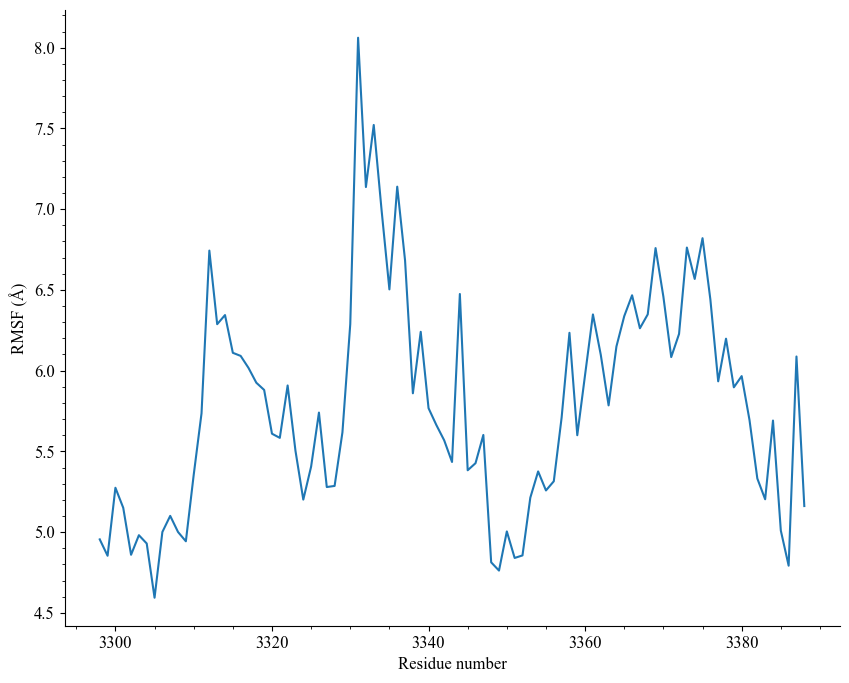

In [11]:
def calculate_rmsf(selection):
    rmsf_data = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_avg = np.mean(rmsf.rmsf)
        rmsf_data.append((rmsf_avg, residue.resid, residue.resname))
    return rmsf_data

# Define your selections
selections = {
    'mtbd': mtbd,
}

# Initialize the plot
fig, ax = setup_plot('Residue number', 'RMSF (Å)')

# Calculate RMSF for each selection and plot
for name, selection in selections.items():
    rmsf_data = calculate_rmsf(selection)
    rmsf_values = [data[0] for data in rmsf_data]
    resids = [data[1] for data in rmsf_data]
    ax.plot(resids, rmsf_values, label=name)
    
    # Sort the data by RMSF values
    rmsf_data.sort()
    # The last ten elements in the sorted list have the highest RMSF
    top_ten_rmsf = rmsf_data[-20:]
    print(f"For {name}, the top ten residues with highest RMSF values are:")
    for rmsf, resid, resname in reversed(top_ten_rmsf):  # reverse to start from highest
        print(f"Residue {resid} ({resname}): RMSF {rmsf}")


In [74]:
# Define segments
segments = {
    'mtbd_H1': range(3301, 3310),  # range is end-exclusive
    'mtbd_H2': range(3315, 3330),
    'mtbd_H3': range(3335, 3342),
    'mtbd_H4': range(3347, 3353),
    'mtbd_H5': range(3361, 3371),
    'mtbd_H6': range(3379, 3386),
}

# Create a dictionary mapping each residue ID to its segment
resid_to_segment = {}
for segment_name, resid_range in segments.items():
    for resid in resid_range:
        resid_to_segment[resid] = segment_name

# In your RMSF function, when printing out the top ten residues, check their segments
for rmsf, resid, resname in reversed(top_ten_rmsf):
    segment = resid_to_segment.get(resid, 'No segment')
    print(f"Residue {resid} ({resname}): RMSF {rmsf}, Segment: {segment}")


Residue 3331 (SER): RMSF 8.061907907183624, Segment: No segment
Residue 3333 (THR): RMSF 7.521618754156133, Segment: No segment
Residue 3336 (LYS): RMSF 7.139454709712122, Segment: mtbd_H3
Residue 3332 (THR): RMSF 7.137071331636147, Segment: No segment
Residue 3334 (ASP): RMSF 6.994368222788728, Segment: No segment
Residue 3375 (PRO): RMSF 6.820309575852803, Segment: No segment
Residue 3373 (SER): RMSF 6.762212709361308, Segment: No segment
Residue 3369 (LYS): RMSF 6.758987543969645, Segment: mtbd_H5
Residue 3312 (ASN): RMSF 6.743561183658494, Segment: No segment
Residue 3337 (GLN): RMSF 6.68251478185725, Segment: mtbd_H3
Residue 3374 (ASN): RMSF 6.567891648803518, Segment: No segment
Residue 3335 (TRP): RMSF 6.503132624015259, Segment: mtbd_H3
Residue 3344 (ARG): RMSF 6.474708570034684, Segment: No segment
Residue 3366 (LYS): RMSF 6.466794574226489, Segment: mtbd_H5
Residue 3370 (ASN): RMSF 6.457736723704023, Segment: mtbd_H5
Residue 3376 (SER): RMSF 6.441339492784247, Segment: No seg

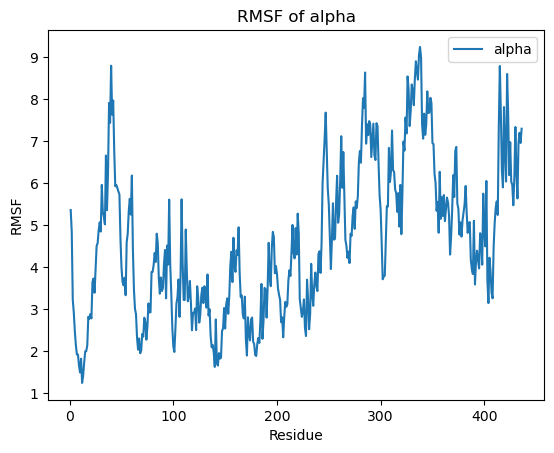

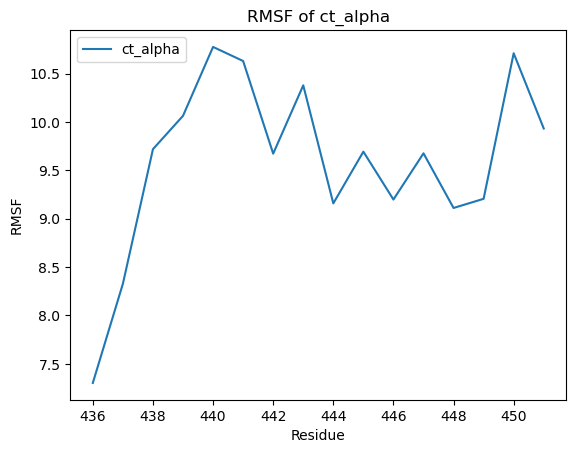

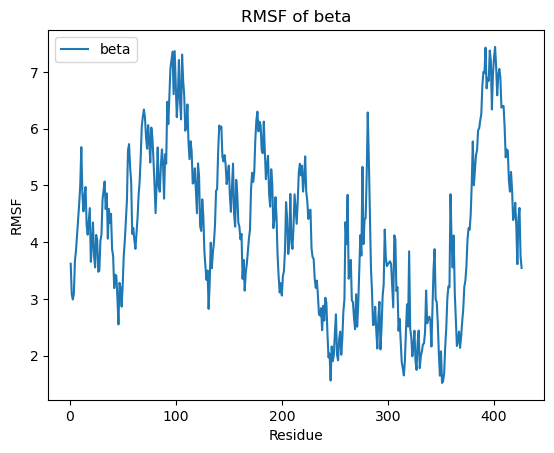

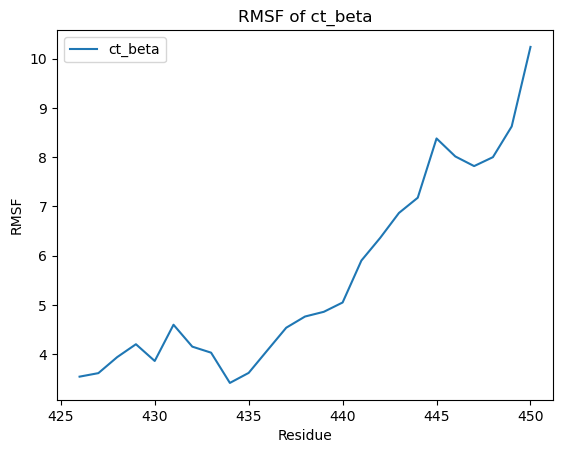

In [10]:
from MDAnalysis.analysis.rms import RMSF

def calculate_rmsf(selection):
    rmsf_per_residue = []
    for residue in selection.residues:
        rmsf = RMSF(residue.atoms).run()
        rmsf_per_residue.append(np.mean(rmsf.rmsf))
    return rmsf_per_residue

# Define your selections
selections = {
    'alpha': alpha,
    'ct_alpha': ct_alpha,
    'beta': beta,
    'ct_beta': ct_beta,
}

# Calculate RMSF for each selection
for name, selection in selections.items():
    rmsf = calculate_rmsf(selection)
    
    # Create a new figure for each selection
    plt.figure()
    plt.plot(selection.residues.resids, rmsf, label=name)
    
    # Customize the plot
    plt.title(f'RMSF of {name}')
    plt.xlabel('Residue')
    plt.ylabel('RMSF')
    plt.legend()
    
    # Show the plot
    plt.show()


In [6]:
import MDAnalysis as mda
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def setup_plot(x_label, y_label, xmin=None, xmax=None, ymin=None, ymax=None, y_ticks=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(7.5, 6)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.tick_params(labelsize=12)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    if xmin is not None and xmax is not None:
        ax.set_xlim(left=xmin, right=xmax)
    if ymin is not None and ymax is not None:
        ax.set_ylim(bottom=ymin, top=ymax)
    if y_ticks is not None:
        ax.set_yticks(y_ticks)
    return fig, ax

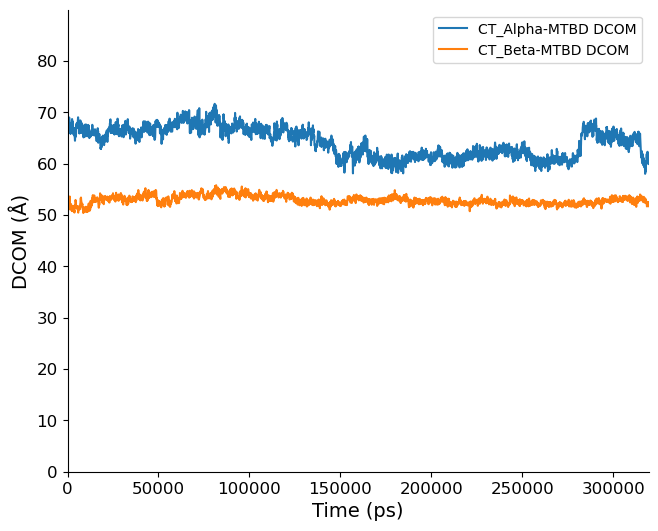

Initial dCOM for alpha:  66.86673120309119
Final dCOM for alpha:  60.53039264296783
Initial dCOM for beta:  52.813271199900456
Final dCOM for beta:  52.011099330090666


In [7]:
# Calculate DCOM for each frame
import seaborn as sns
dcom_values_ct_alpha = []
dcom_values_ct_beta = []
for ts in u.trajectory:
    dcom_ct_alpha = np.linalg.norm(ct_alpha.center_of_mass() - mtbd.center_of_mass())
    dcom_ct_beta = np.linalg.norm(ct_beta.center_of_mass() - mtbd.center_of_mass())
    dcom_values_ct_alpha.append(dcom_ct_alpha)
    dcom_values_ct_beta.append(dcom_ct_beta)

# Generate the x-values (time)
time = np.arange(len(dcom_values_ct_alpha)) * u.trajectory.dt

# Create a DataFrame
df = pd.DataFrame({
    'Time (ps)': time, 
    'CT_Alpha DCOM (Å)': dcom_values_ct_alpha, 
    'CT_Beta DCOM (Å)': dcom_values_ct_beta
})

# Calculate the rolling average with a window size of 100
df['Smoothed CT_Alpha DCOM (Å)'] = df['CT_Alpha DCOM (Å)'].rolling(window=1).mean()
df['Smoothed CT_Beta DCOM (Å)'] = df['CT_Beta DCOM (Å)'].rolling(window=1).mean()

# Setup the plot
fig, ax = setup_plot('Time (ps)', 'DCOM (Å)', xmin=0, xmax=time.max(), ymin=0, ymax=90)

# Set y-ticks
ax.set_yticks(np.arange(0, 85, 10))

# Plot the smoothed DCOM values using seaborn
sns.lineplot(x='Time (ps)', y='Smoothed CT_Alpha DCOM (Å)', data=df, ax=ax, label='CT_Alpha-MTBD DCOM')
sns.lineplot(x='Time (ps)', y='Smoothed CT_Beta DCOM (Å)', data=df, ax=ax, label='CT_Beta-MTBD DCOM')

plt.legend()
plt.savefig("Final Graphs/Smoothed_DCOM_CT_a_b_MTBD.png", dpi=300)
plt.show()

# Print initial and final dCOM values for alpha
print("Initial dCOM for alpha: ", dcom_values_ct_alpha[1])
print("Final dCOM for alpha: ", dcom_values_ct_alpha[-1])

# Print initial and final dCOM values for beta
print("Initial dCOM for beta: ", dcom_values_ct_beta[1])
print("Final dCOM for beta: ", dcom_values_ct_beta[-1])


In [75]:
# Define your selections
selections = {
    'mtbd_H1': u.select_atoms('resid 3301:3309'),
    'mtbd_H2': u.select_atoms('resid 3315:3329'),
    'mtbd_H3': u.select_atoms('resid 3335:3341'),
    'mtbd_H4': u.select_atoms('resid 3347:3352'),
    'mtbd_H5': u.select_atoms('resid 3361:3370'),
    'mtbd_H6': u.select_atoms('resid 3379:3385'),
}

# Initialize dictionaries to store dCOM values
dcom_values_ct_alpha = {name: [] for name in selections.keys()}
dcom_values_ct_beta = {name: [] for name in selections.keys()}

# Calculate DCOM for each frame
for ts in u.trajectory:
    for name, selection in selections.items():
        dcom_ct_alpha = np.linalg.norm(ct_alpha.center_of_mass() - selection.center_of_mass())
        dcom_ct_beta = np.linalg.norm(ct_beta.center_of_mass() - selection.center_of_mass())
        dcom_values_ct_alpha[name].append(dcom_ct_alpha)
        dcom_values_ct_beta[name].append(dcom_ct_beta)

# Now you have dCOM values for ct_alpha and ct_beta with each selection in the `dcom_values_ct_alpha` and `dcom_values_ct_beta` dictionaries respectively.
# You can use these dictionaries to create DataFrames and plot the data as you did in your code.


In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate the x-values (time)
time = np.arange(len(dcom_values_ct_alpha['mtbd_H1'])) * u.trajectory.dt

# Plot the dCOM values for each selection
for name in selections.keys():
    plt.figure(figsize=(10, 5))
    
    df_alpha = pd.DataFrame({
        'Time (ps)': time, 
        'DCOM (Å)': dcom_values_ct_alpha[name]
    })
    df_alpha['Smoothed DCOM (Å)'] = df_alpha['DCOM (Å)'].rolling(window=1).mean()
    plt.plot(df_alpha['Time (ps)'], df_alpha['DCOM (Å)'], label=f'CT_Alpha-{name} DCOM')

    df_beta = pd.DataFrame({
        'Time (ps)': time, 
        'DCOM (Å)': dcom_values_ct_beta[name]
    })
    df_beta['Smoothed DCOM (Å)'] = df_beta['DCOM (Å)'].rolling(window=1).mean()
    plt.plot(df_beta['Time (ps)'], df_beta['DCOM (Å)'], label=f'CT_Beta-{name} DCOM')

    # Add labels and title
    plt.xlabel('Time (ps)')
    plt.ylabel('Smoothed DCOM (Å)')

    # Add legend to the plot
    plt.legend()

    # Save the plot as png with 300 dpi
    plt.savefig(f"dcom_plot_{name}.png", dpi=300)

    # Display the plot
    plt.show()
    print(f'Smoothed DCOM of CT_Alpha and CT_Beta with {name}')
        # Print initial and final dCOM values for alpha
    print(f"Initial dCOM for CT_Alpha-{name}: ", dcom_values_ct_alpha[name][1])
    print(f"Final dCOM for CT_Alpha-{name}: ", dcom_values_ct_alpha[name][-1])

    # Print initial and final dCOM values for beta
    print(f"Initial dCOM for CT_Beta-{name}: ", dcom_values_ct_beta[name][1])
    print(f"Final dCOM for CT_Beta-{name}: ", dcom_values_ct_beta[name][-1])
    print("\n")


TypeError: list indices must be integers or slices, not str

Average contacts between MTBD and ct_alpha = 0.5000623514900873
Average contacts between MTBD and ct_beta = 0.3797115946719515


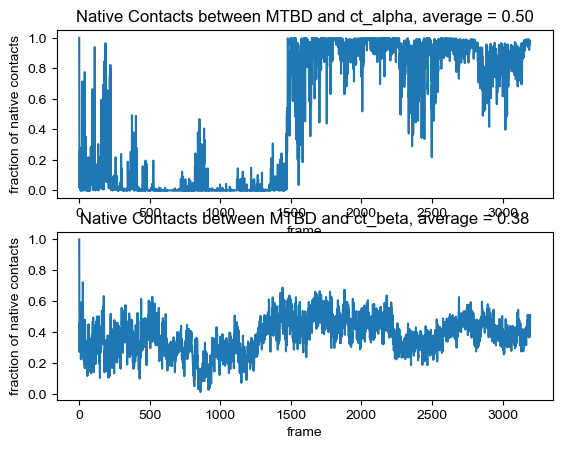

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import contacts

# Initialize Universe with Gromacs files
u = mda.Universe('npt_modified.gro', 'centered_nojump_md.xtc')

# Define selections
sel_mtbd = "resid 3301:3385"  # MTBD
sel_ct_alpha = "bynum 4368:4505"  # ct_alpha
sel_ct_beta = "bynum 8802:9035"  # ct_beta

# Reference groups
mtbd = u.select_atoms(sel_mtbd)
ct_alpha = u.select_atoms(sel_ct_alpha)
ct_beta = u.select_atoms(sel_ct_beta)

# Set up analysis of native contacts ("salt bridges"); salt bridges have a distance <6 A
ca1 = contacts.Contacts(u, select=(sel_mtbd, sel_ct_alpha),
                        refgroup=(mtbd, ct_alpha), radius=40.0)
ca2 = contacts.Contacts(u, select=(sel_mtbd, sel_ct_beta),
                        refgroup=(mtbd, ct_beta), radius=40.0)

# Iterate through trajectory and perform analysis of "native contacts" Q
ca1.run()
ca2.run()

# Print number of average contacts
average_contacts_ca1 = np.mean(ca1.results.timeseries[:, 1])
average_contacts_ca2 = np.mean(ca2.results.timeseries[:, 1])
print('Average contacts between MTBD and ct_alpha = {}'.format(average_contacts_ca1))
print('Average contacts between MTBD and ct_beta = {}'.format(average_contacts_ca2))

# Plot time series q(t)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(ca1.results.timeseries[:, 0], ca1.results.timeseries[:, 1])
ax1.set(xlabel='frame', ylabel='fraction of native contacts',
       title='Native Contacts between MTBD and ct_alpha, average = {:.2f}'.format(average_contacts_ca1))
ax2.plot(ca2.results.timeseries[:, 0], ca2.results.timeseries[:, 1])
ax2.set(xlabel='frame', ylabel='fraction of native contacts',
       title='Native Contacts between MTBD and ct_beta, average = {:.2f}'.format(average_contacts_ca2))
fig.show()


Average contacts between MTBD and ct_alpha for frames 0-500 = nan
Average contacts between MTBD and ct_beta for frames 0-500 = nan
Average contacts between MTBD and ct_alpha for frames 500-1000 = nan
Average contacts between MTBD and ct_beta for frames 500-1000 = nan
Average contacts between MTBD and ct_alpha for frames 1000-1500 = nan
Average contacts between MTBD and ct_beta for frames 1000-1500 = nan
Average contacts between MTBD and ct_alpha for frames 1500-2000 = nan
Average contacts between MTBD and ct_beta for frames 1500-2000 = nan
Average contacts between MTBD and ct_alpha for frames 2000-2500 = nan
Average contacts between MTBD and ct_beta for frames 2000-2500 = nan
Average contacts between MTBD and ct_alpha for frames 2500-3000 = nan
Average contacts between MTBD and ct_beta for frames 2500-3000 = nan
Average contacts between MTBD and ct_alpha for frames 3000-3500 = nan
Average contacts between MTBD and ct_beta for frames 3000-3500 = nan


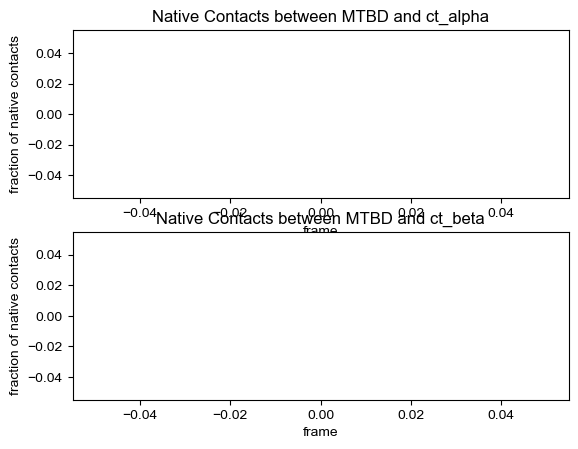

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import contacts

# Initialize Universe with Gromacs files
u = mda.Universe('npt_modified.gro', 'centered_nojump_md.xtc')

# Define selections
sel_mtbd = "resid 3301:3385"  # MTBD
sel_ct_alpha = "bynum 4368:4505"  # ct_alpha
sel_ct_beta = "bynum 8802:9035"  # ct_beta

# Reference groups
mtbd = u.select_atoms(sel_mtbd)
ct_alpha = u.select_atoms(sel_ct_alpha)
ct_beta = u.select_atoms(sel_ct_beta)

# Set up analysis of native contacts ("salt bridges"); salt bridges have a distance <6 A
ca1 = contacts.Contacts(u, select=(sel_mtbd, sel_ct_alpha),
                        refgroup=(mtbd, ct_alpha), radius=4.5)
ca2 = contacts.Contacts(u, select=(sel_mtbd, sel_ct_beta),
                        refgroup=(mtbd, ct_beta), radius=4.5)

# Iterate through trajectory and perform analysis of "native contacts" Q
ca1.run()
ca2.run()

# Calculate average contacts for every 500 frames
average_contacts_ca1 = [np.mean(ca1.results.timeseries[i:i+500, 1]) for i in range(0, len(ca1.results.timeseries), 500)]
average_contacts_ca2 = [np.mean(ca2.results.timeseries[i:i+500, 1]) for i in range(0, len(ca2.results.timeseries), 500)]

# Print average contacts
for i, (avg_ca1, avg_ca2) in enumerate(zip(average_contacts_ca1, average_contacts_ca2)):
    print(f'Average contacts between MTBD and ct_alpha for frames {i*500}-{(i+1)*500} = {avg_ca1}')
    print(f'Average contacts between MTBD and ct_beta for frames {i*500}-{(i+1)*500} = {avg_ca2}')

# Plot time series q(t)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(ca1.results.timeseries[:, 0], ca1.results.timeseries[:, 1])
ax1.set(xlabel='frame', ylabel='fraction of native contacts',
       title='Native Contacts between MTBD and ct_alpha')
ax2.plot(ca2.results.timeseries[:, 0], ca2.results.timeseries[:, 1])
ax2.set(xlabel='frame', ylabel='fraction of native contacts',
       title='Native Contacts between MTBD and ct_beta')
fig.show()


Average contacts between MTBD and alpha = 0.06631644819181873
Average contacts between MTBD and beta = 0.12034737956207316


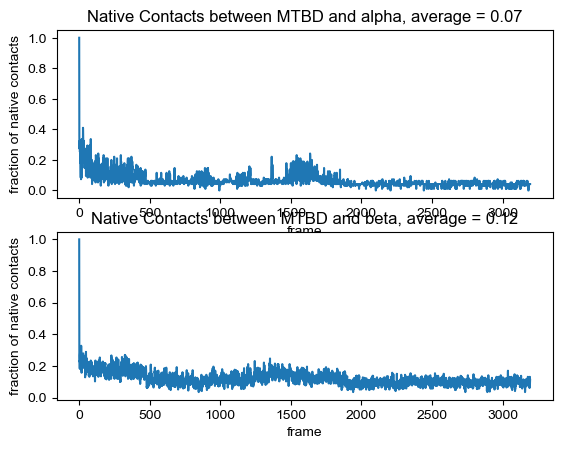

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import contacts

# Initialize Universe with Gromacs files
u = mda.Universe('npt_modified.gro', 'centered_nojump_md.xtc')

# Define selections
alpha = u.select_atoms('bynum 1:4368')
beta = u.select_atoms('bynum 4506:8802')
mtbd = u.select_atoms('bynum 9809:10726')

# Set up analysis of native contacts ("salt bridges"); salt bridges have a distance <6 A
ca1 = contacts.Contacts(u, select=("bynum 9809:10726", "bynum 1:4368"),
                        refgroup=(mtbd, alpha), radius=4.5)
ca2 = contacts.Contacts(u, select=("bynum 9809:10726", "bynum 4506:8802"),
                        refgroup=(mtbd, beta), radius=4.5)

# Iterate through trajectory and perform analysis of "native contacts" Q
ca1.run()
ca2.run()

# Print number of average contacts
average_contacts_ca1 = np.mean(ca1.results.timeseries[:, 1])
average_contacts_ca2 = np.mean(ca2.results.timeseries[:, 1])
print('Average contacts between MTBD and alpha = {}'.format(average_contacts_ca1))
print('Average contacts between MTBD and beta = {}'.format(average_contacts_ca2))

# Plot time series q(t)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(ca1.results.timeseries[:, 0], ca1.results.timeseries[:, 1])
ax1.set(xlabel='frame', ylabel='fraction of native contacts',
       title='Native Contacts between MTBD and alpha, average = {:.2f}'.format(average_contacts_ca1))
ax2.plot(ca2.results.timeseries[:, 0], ca2.results.timeseries[:, 1])
ax2.set(xlabel='frame', ylabel='fraction of native contacts',
       title='Native Contacts between MTBD and beta, average = {:.2f}'.format(average_contacts_ca2))
fig.show()


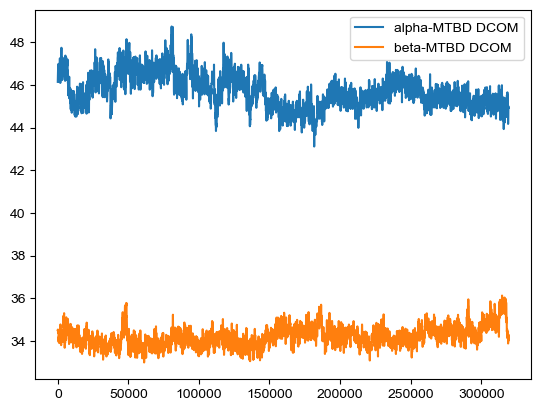

In [51]:
dcom_values_alpha = []
dcom_values_beta = []

for ts in u.trajectory:
    dcom_alpha = np.linalg.norm(alpha.center_of_mass() - mtbd.center_of_mass())
    dcom_beta = np.linalg.norm(beta.center_of_mass() - mtbd.center_of_mass())
    dcom_values_alpha.append(dcom_alpha)
    dcom_values_beta.append(dcom_beta)

# Generate the x-values (time)
time = np.arange(len(dcom_values_alpha)) * u.trajectory.dt

# Create a DataFrame
df = pd.DataFrame({
    'Time (ps)': time, 
    'alpha DCOM (Å)': dcom_values_alpha, 
    'beta DCOM (Å)': dcom_values_beta
})

# Create a new figure and axes
fig, ax = plt.subplots()

# Plot the DCOM values
ax.plot(df['Time (ps)'], df['alpha DCOM (Å)'], label='alpha-MTBD DCOM')
ax.plot(df['Time (ps)'], df['beta DCOM (Å)'], label='beta-MTBD DCOM')

plt.legend()
plt.savefig("Final Graphs/DCOM_a_b_MTBD.png", dpi=300)
plt.show()



In [60]:
# Print initial and final dCOM values for alpha
print("Initial dCOM for alpha: ", dcom_values_alpha[0])
print("Final dCOM for alpha: ", dcom_values_alpha[-1])

# Print initial and final dCOM values for beta
print("Initial dCOM for beta: ", dcom_values_beta[0])
print("Final dCOM for beta: ", dcom_values_beta[-1])
print ("Time 1:", time[0])
print ("Time 2:", time[-1])

Initial dCOM for alpha:  46.14751573558653
Final dCOM for alpha:  44.91825587328335
Initial dCOM for beta:  34.510987329689485
Final dCOM for beta:  34.03533345290372
Time 1: 0.0
Time 2: 319500.0


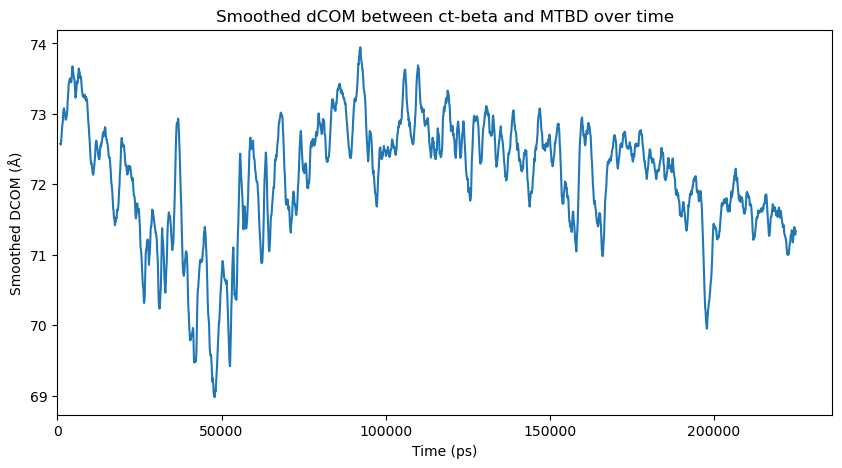

In [35]:

# Calculate DCOM for each frame
dcom_values = []
for ts in u.trajectory:
    dcom = np.linalg.norm(ct_beta.center_of_mass() - mtbd.center_of_mass())
    dcom_values.append(dcom)

# Generate the x-values (time)
time = np.arange(len(dcom_values)) * u.trajectory.dt

# Create a DataFrame
df = pd.DataFrame({'Time (ps)': time, 'DCOM (Å)': dcom_values})

# Calculate the rolling average with a window size of 100
df['Smoothed DCOM (Å)'] = df['DCOM (Å)'].rolling(window=10).mean()

# Plot the smoothed DCOM values using seaborn
plt.figure(figsize=[10,5])
ax = sns.lineplot(x='Time (ps)', y='Smoothed DCOM (Å)', data=df)
plt.title('Smoothed dCOM between ct-beta and MTBD over time')

# Set the x-axis to start at zero
ax.set_xlim(left=0)
plt.show()


In [5]:
def calculate_rmsf(selection):
    rmsf_per_residue = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_per_residue.append((residue.resname, residue.resid, np.mean(rmsf.rmsf)))
    return sorted(rmsf_per_residue, key=lambda x: x[2], reverse=True)[:10]

# Define your selections
selections = {
    'Alpha': alpha,
    'Ct_Alpha': ct_alpha,
    'Beta': beta,
    'Ct_Beta': ct_beta,
}

# Calculate RMSF for each selection
for name, selection in selections.items():
    print(f"Top 10 residues with highest RMSF values for {name}:")
    for resname, resid, rmsf in calculate_rmsf(selection):
        print(f"Residue {resname} {resid}: RMSF = {rmsf}")
    print("\n")


Top 10 residues with highest RMSF values for Alpha:
Residue LYS 338: RMSF = 9.27968972104929
Residue THR 337: RMSF = 9.060317336679974
Residue ARG 339: RMSF = 9.037202154039138
Residue GLU 415: RMSF = 8.933595794156227
Residue THR 334: RMSF = 8.836814304877056
Residue LYS 40: RMSF = 8.689170221504197
Residue ARG 422: RMSF = 8.65672294296345
Residue ILE 335: RMSF = 8.63959223454416
Residue GLN 285: RMSF = 8.588730247069298
Residue LYS 336: RMSF = 8.440801924350001


Top 10 residues with highest RMSF values for Ct_Alpha:
Residue GLU 450: RMSF = 10.704728740763626
Residue VAL 440: RMSF = 10.678370979892332
Residue GLU 441: RMSF = 10.518696911836575
Residue GLU 443: RMSF = 10.276298644890218
Residue SER 439: RMSF = 9.998776890437256
Residue TYR 451: RMSF = 9.854534075843318
Residue GLU 447: RMSF = 9.705952605521867
Residue GLU 445: RMSF = 9.703612752864236
Residue ASP 438: RMSF = 9.624758538910193
Residue GLY 442: RMSF = 9.588162574897265


Top 10 residues with highest RMSF values for Beta